<a href="https://colab.research.google.com/github/maskot1977/ipython_notebook/blob/master/shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP のインストール

In [1]:
!pip install shap

# SampleDataset Generator のインストール

In [2]:
!!pip install git+https://github.com/maskot1977/sampledataset_generator.git

['Collecting git+https://github.com/maskot1977/sampledataset_generator.git',
 '  Cloning https://github.com/maskot1977/sampledataset_generator.git to /tmp/pip-req-build-19vu213j',
 '  Running command git clone -q https://github.com/maskot1977/sampledataset_generator.git /tmp/pip-req-build-19vu213j',
 'Requirement already satisfied (use --upgrade to upgrade): sampledataset-generator==0.1.0 from git+https://github.com/maskot1977/sampledataset_generator.git in /usr/local/lib/python3.6/dist-packages',
 'Building wheels for collected packages: sampledataset-generator',
 '  Building wheel for sampledataset-generator (setup.py) ... \x1b[?25l\x1b[?25hdone',
 '  Created wheel for sampledataset-generator: filename=sampledataset_generator-0.1.0-cp36-none-any.whl size=4240 sha256=8f42d26e31a1d29c6192dcc45cc977ddad79f8ea6a5c6ee037b3bca81b9ffef6',
 '  Stored in directory: /tmp/pip-ephem-wheel-cache-yq63780w/wheels/45/04/cf/e9f65e7ff4100654a7511503a2873b57e5f83431fccef54f2c',
 'Successfully built sam

# 線形データセットの生成

In [3]:
from sampledataset_generator import generator

dataset = generator.SampleDatasetGenerator()
dataset.generate()

In [ ]:
dataset.X

In [ ]:
dataset.Y

In [ ]:
dataset.coef

# 様々な機械学習モデル

In [4]:
models = []

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = make_pipeline(
        StandardScaler(), 
        LinearRegression()
        )

model.fit(dataset.X, dataset.Y)
models.append(["MLR", model])
model.score(dataset.X, dataset.Y)

1.0

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

model = make_pipeline(
        StandardScaler(), 
        PLSRegression(n_components=3)
        )

model.fit(dataset.X, dataset.Y)
models.append(["PLSR", model])
model.score(dataset.X, dataset.Y)

0.9997620778059788

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

model = make_pipeline(
        StandardScaler(), 
        LinearSVR(C=50, epsilon=1e-05)
        )

model.fit(dataset.X, dataset.Y)
models.append(["LinearSVR", model])
model.score(dataset.X, dataset.Y)

0.99999999999977

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model = make_pipeline(
        StandardScaler(), 
        LinearSVR(C=50, epsilon=1e-05)
        )

model.fit(dataset.X, dataset.Y)
models.append(["SVR", model])
model.score(dataset.X, dataset.Y)

0.9999999999998109

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(
            random_state=1, 
            max_depth=8, 
            n_estimators=16
            )
        )

model.fit(dataset.X, dataset.Y)
models.append(["RFR", model])
model.score(dataset.X, dataset.Y)

0.9739525461801356

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

model = make_pipeline(
        StandardScaler(), 
        MLPRegressor(
            random_state=1, 
            max_iter=2000, 
            early_stopping=True,
            hidden_layer_sizes=(
                100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100
                )
            )
        )

model.fit(dataset.X, dataset.Y)
models.append(["MLPR", model])
model.score(dataset.X, dataset.Y)

0.9854995580402678

# SHAPで重要度算出

In [11]:
import shap

shap.initjs() # load JS visualization code to notebook

shap_valuess = []
for model_name, model in models:
    print(model_name)
    pred_func = lambda X: model.predict(X).reshape(len(X))
    explainer = shap.KernelExplainer(pred_func, dataset.X)
    shap_values = explainer.shap_values(dataset.X)
    shap_valuess.append(shap_values)

MLR



PLSR



LinearSVR



SVR



RFR



MLPR


MLR


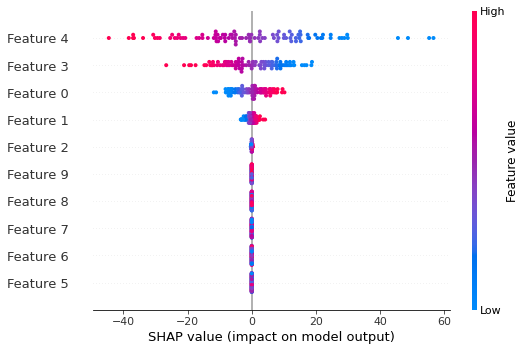

PLSR


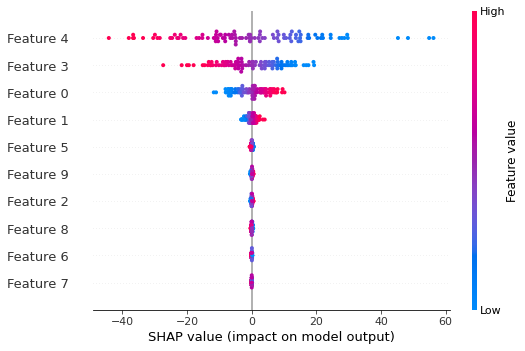

LinearSVR


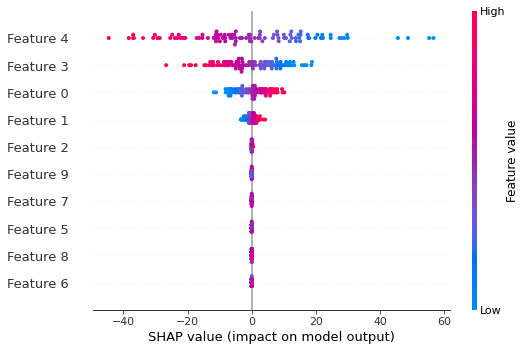

SVR


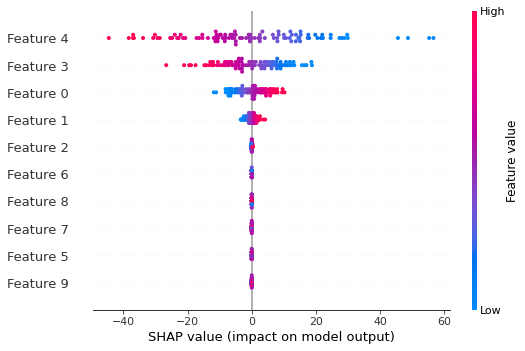

RFR


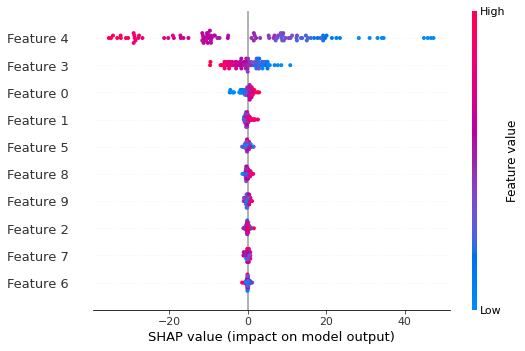

MLPR


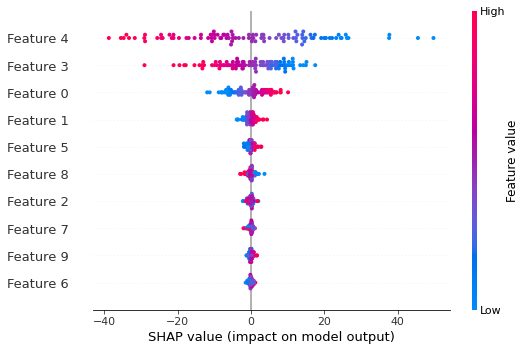

In [12]:
for m, shap_values in zip(models, shap_valuess):
    print(m[0])
    shap.summary_plot(shap_values, features=dataset.X, plot_type="dot")

MLR


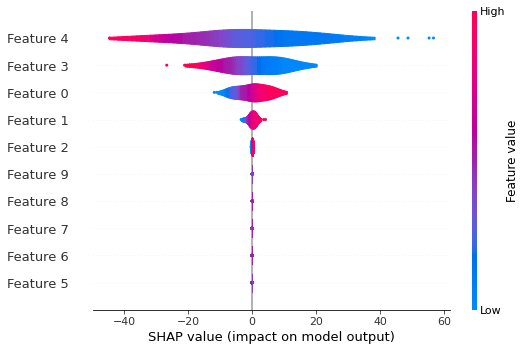

PLSR


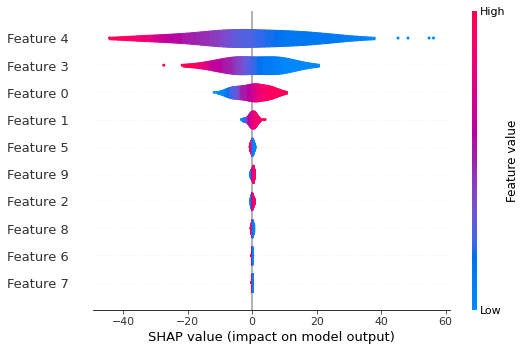

LinearSVR


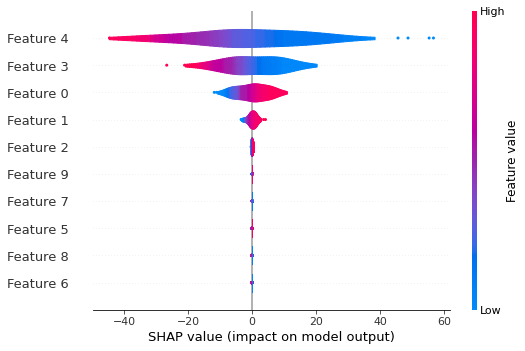

SVR


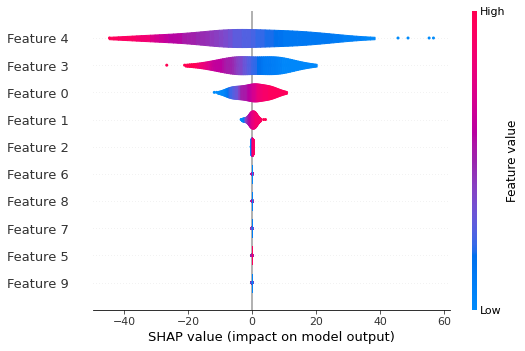

RFR


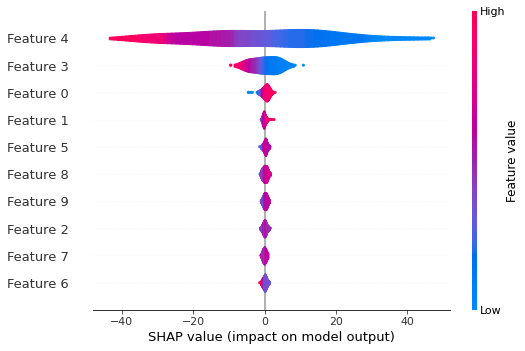

MLPR


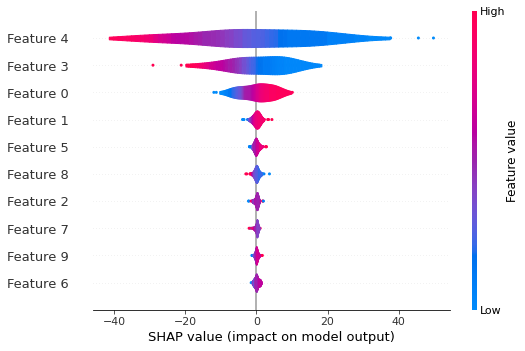

In [13]:
for m, shap_values in zip(models, shap_valuess):
    print(m[0])
    shap.summary_plot(shap_values, features=dataset.X, plot_type="violin")

MLR


invalid value encountered in true_divide


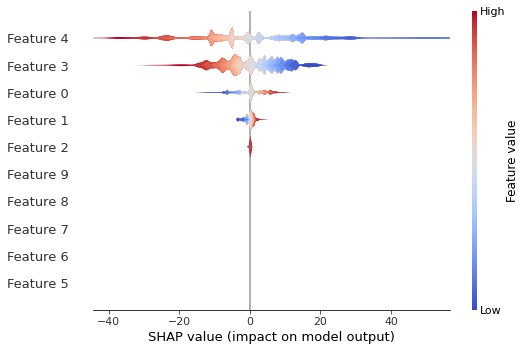

PLSR


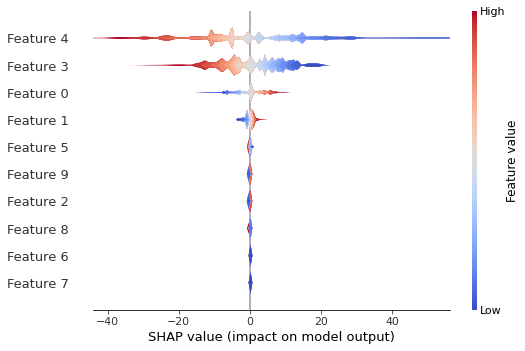

LinearSVR


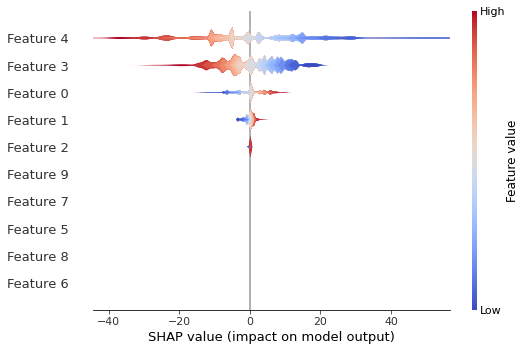

SVR


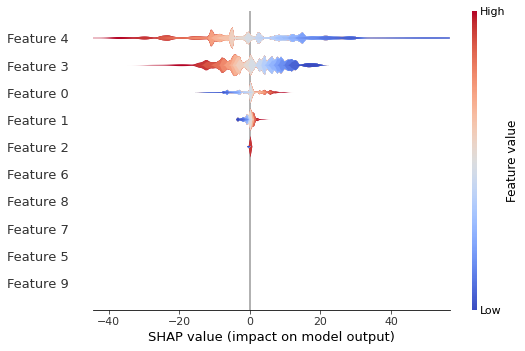

RFR


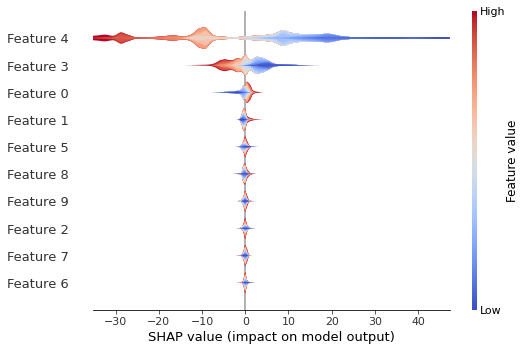

MLPR


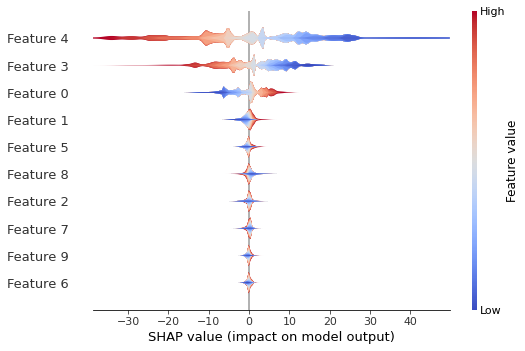

In [14]:
for m, shap_values in zip(models, shap_valuess):
    print(m[0])
    shap.summary_plot(shap_values, features=dataset.X, plot_type="layered_violin")

MLR


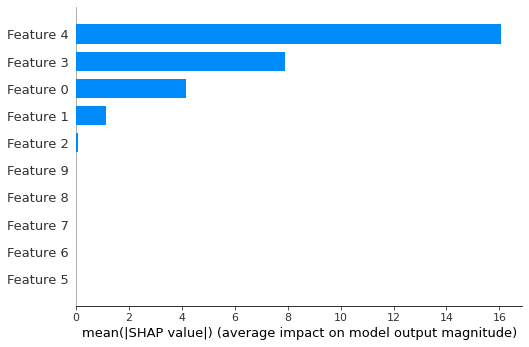

PLSR


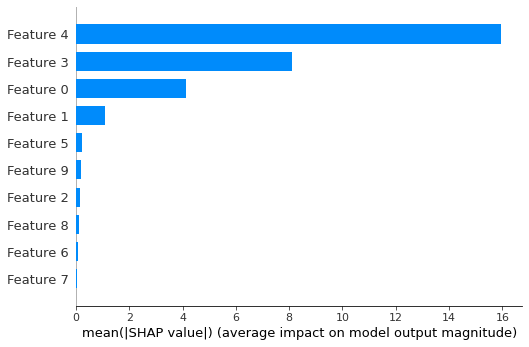

LinearSVR


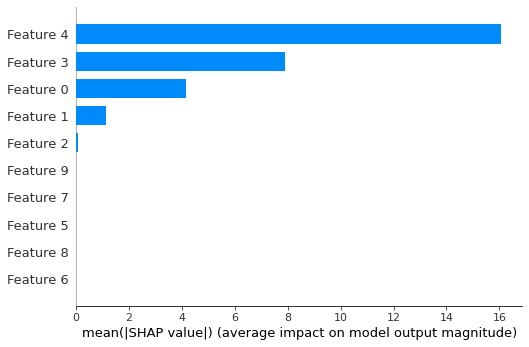

SVR


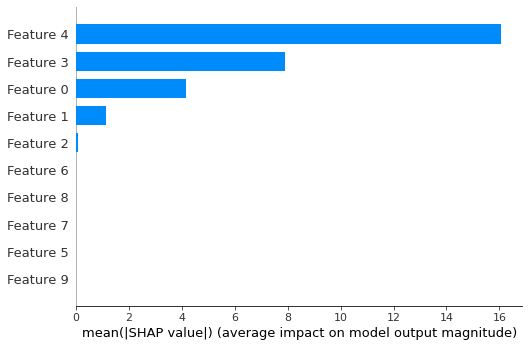

RFR


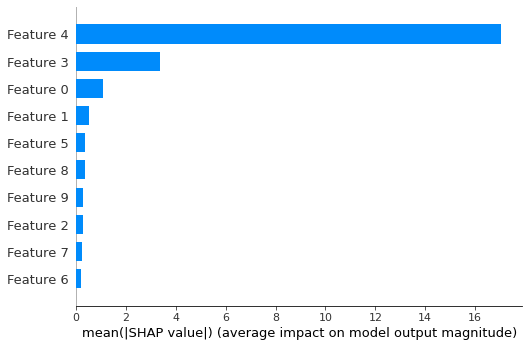

MLPR


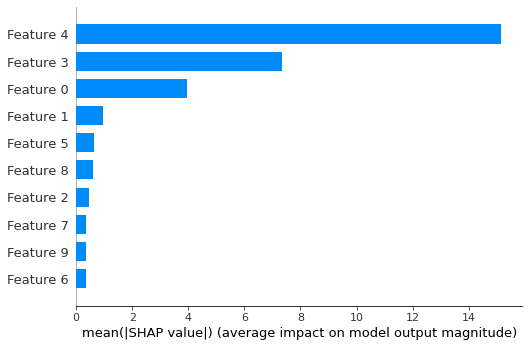

In [15]:
for m, shap_values in zip(models, shap_valuess):
    print(m[0])
    shap.summary_plot(shap_values, features=dataset.X, plot_type="bar")

In [16]:
import numpy as np
import pandas as pd

global_shap_valuess = []    
for m, shap_values in zip(models, shap_valuess):
    global_shap_values = np.abs(shap_values).mean(0)
    global_shap_valuess.append(global_shap_values)

global_shap_valuess_pd = pd.DataFrame(global_shap_valuess, index=[n for n, m in models])
global_shap_valuess_pd.T.style.bar(subset=[n for n, m in models])

,MLR,PLSR,LinearSVR,SVR,RFR,MLPR
0,4.166066,4.142079,4.166064,4.166066,1.065069,3.953169
1,1.143483,1.100305,1.143478,1.143481,0.504438,0.948094
2,0.089338,0.150764,0.089338,0.089340,0.271347,0.461836
3,7.883578,8.103368,7.883577,7.883579,3.367981,7.351381
4,16.071745,15.957399,16.071743,16.071742,17.048686,15.158125
5,0.000000,0.211592,0.000002,0.000001,0.344703,0.650824
6,0.000000,0.062019,0.000001,0.000006,0.215044,0.347641
7,0.000000,0.028273,0.000004,0.000002,0.251861,0.363525
8,0.000000,0.122634,0.000002,0.000004,0.343488,0.615735
9,0.000000,0.174849,0.000006,0.000001,0.273996,0.352883


In [17]:
shap_corr_valuess = []    
for m, shap_values in zip(models, shap_valuess):
    shap_corr = [np.corrcoef(shap_values[:, i], dataset.X[:, i])[0, 1] for i in range(len(shap_values.T))]
    shap_corr_valuess.append(shap_corr)

shap_corr_valuess_pd = pd.DataFrame(shap_corr_valuess, index=[n for n, m in models])
shap_corr_valuess_pd.T.style.bar(subset=[n for n, m in models], align="mid", color=["red", "orange"])

invalid value encountered in true_divide
invalid value encountered in true_divide


,MLR,PLSR,LinearSVR,SVR,RFR,MLPR
0,1.000000,1.000000,1.000000,1.000000,0.860928,0.995731
1,1.000000,1.000000,1.000000,1.000000,0.682243,0.898264
2,1.000000,1.000000,1.000000,1.000000,0.081484,0.252027
3,-1.000000,-1.000000,-1.000000,-1.000000,-0.957558,-0.994315
4,-1.000000,-1.000000,-1.000000,-1.000000,-0.984154,-0.996975
5,nan,-1.000000,1.000000,1.000000,0.355020,0.760428
6,nan,-1.000000,-1.000000,-1.000000,-0.436965,0.321808
7,nan,-1.000000,-1.000000,-1.000000,0.160452,-0.202601
8,nan,-1.000000,-1.000000,-1.000000,0.388405,-0.764219
9,nan,1.000000,1.000000,-1.000000,0.294224,0.606935


In [30]:
gsv = np.array(global_shap_valuess)
scv = np.array(shap_corr_valuess)
global_shap_coefs = gsv * scv
global_shap_coefs_pd = pd.DataFrame(global_shap_coefs, index=[n for n, m in models])
global_shap_coefs_pd.T.style.bar(subset=[n for n, m in models], align="mid", color=["red", "orange"])

,MLR,PLSR,LinearSVR,SVR,RFR,MLPR
0,4.166066,4.142079,4.166064,4.166066,0.916948,3.936294
1,1.143483,1.100305,1.143478,1.143481,0.344149,0.851639
2,0.089338,0.150764,0.089338,0.089340,0.022110,0.116395
3,-7.883578,-8.103368,-7.883577,-7.883579,-3.225036,-7.309592
4,-16.071745,-15.957399,-16.071743,-16.071742,-16.778539,-15.112269
5,nan,-0.211592,0.000002,0.000001,0.122376,0.494905
6,nan,-0.062019,-0.000001,-0.000006,-0.093967,0.111874
7,nan,-0.028273,-0.000004,-0.000002,0.040412,-0.073650
8,nan,-0.122634,-0.000002,-0.000004,0.133412,-0.470556
9,nan,0.174849,0.000006,-0.000001,0.080616,0.214177


MLR


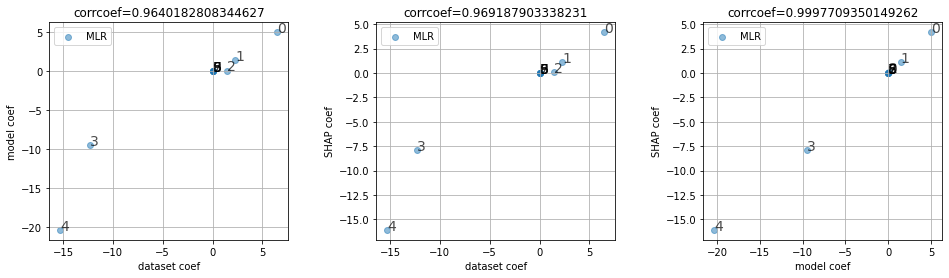

LinearSVR


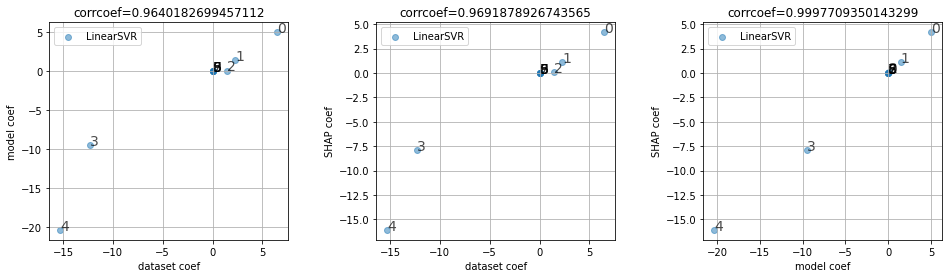

RFR


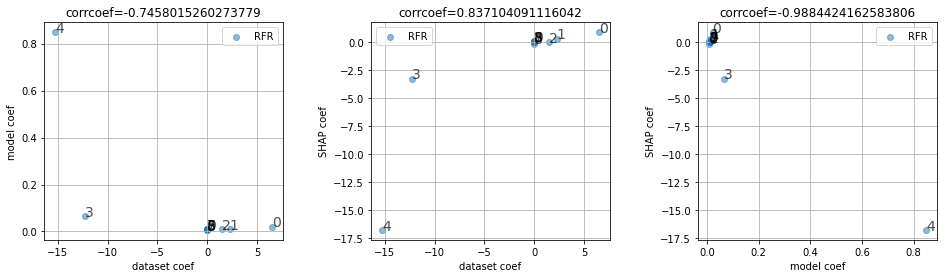

In [45]:
import matplotlib.pyplot as plt

for i, m in enumerate(models):
    if i not in [0, 2, 4]:
        continue
    
    modelname, model = m
    print(modelname)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4),
                             gridspec_kw=dict(width_ratios=[9, 1, 9, 1, 9]))

    if i == 4:
        model_coef = model[1].feature_importances_
    else:
        model_coef = model[1].coef_
    shap_coef = np.nan_to_num(global_shap_coefs[i])

    corrcoef = np.corrcoef(dataset.coef, model_coef)[0, 1]
    axes[0].set_title("corrcoef=" + str(corrcoef))
    axes[0].scatter(dataset.coef, model_coef, alpha=0.5, label=modelname)
    for i, xy in enumerate(zip(dataset.coef, model_coef)):
        axes[0].text(xy[0], xy[1], i, alpha=0.7, size=14)
    axes[0].set_xlabel("dataset coef")
    axes[0].set_ylabel("model coef")
    axes[0].grid()
    axes[0].legend()

    axes[1].axis("off")

    corrcoef = np.corrcoef(dataset.coef, shap_coef)[0, 1]
    axes[2].set_title("corrcoef=" + str(corrcoef))
    axes[2].scatter(dataset.coef, shap_coef, alpha=0.5, label=modelname)
    for i, xy in enumerate(zip(dataset.coef, shap_coef)):
        axes[2].text(xy[0], xy[1], i, alpha=0.7, size=14)
    axes[2].set_xlabel("dataset coef")
    axes[2].set_ylabel("SHAP coef")
    axes[2].grid()
    axes[2].legend()

    axes[3].axis("off")

    corrcoef = np.corrcoef(model_coef, shap_coef)[0, 1]
    axes[4].set_title("corrcoef=" + str(corrcoef))
    axes[4].scatter(model_coef, shap_coef, alpha=0.5, label=modelname)
    for i, xy in enumerate(zip(model_coef, shap_coef)):
        axes[4].text(xy[0], xy[1], i, alpha=0.7, size=14)
    axes[4].set_xlabel("model coef")
    axes[4].set_ylabel("SHAP coef")
    axes[4].grid()
    axes[4].legend()

    plt.show()

In [27]:
shap_coef

array([4.16606617, 4.14207947, 4.16606405, 4.16606592, 0.9169477 ,
       3.93629445])

In [29]:
dataset.coef

array([  6.49685443,   2.26780342,   1.49933315, -12.30385526,
       -15.28180134,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])